In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import glob
import cv2

In [2]:
train_files=glob.glob("C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train/*/**")

In [3]:
len(train_files)

3103

In [4]:
from random import shuffle
shuffle(train_files)
train_files

['C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\\with_mask\\image42.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\\without_mask\\Faceimg260.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\\with_mask\\image1,807.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\\without_mask\\images (28).jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\\without_mask\\Faceimg229.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\\without_mask\\Faceimg46.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\\without_mask\\Faceimg1,559.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\\with_mask\\image154.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\\with_mask\\image41.jpg',
 'C:/Users/DIBYAJYOTI HALOI/

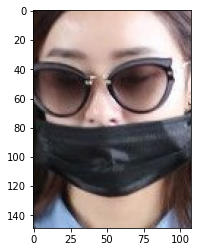

In [5]:
from PIL import Image
img=Image.open(train_files[1000])
plt.imshow(img)

In [6]:
np.array(img).shape

(149, 108, 3)

In [7]:
grey_files=[]

In [8]:
for item in train_files:
    img=Image.open(item).convert('L')
    img.save('greyscale.jpeg')
    grey_files.append(img)

C:\Users\DIBYAJYOTI HALOI\OneDrive\Documents\tempo\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
np.array(grey_files[0]).shape

(188, 112)

In [10]:
modified_files=[]

In [11]:
for item in grey_files:
    img=item.resize((128,128))
    modified_files.append(img)

In [17]:
img_array=np.array(modified_files[0])

In [18]:
img_array

array([[ 66,  75,  70, ..., 168, 145, 130],
       [ 69,  73,  62, ..., 165, 147, 135],
       [ 64,  64,  52, ..., 165, 147, 137],
       ...,
       [ 84,  89,  96, ...,  42,  45,  50],
       [ 82,  90,  99, ...,  43,  43,  50],
       [ 81,  89, 102, ...,  43,  43,  50]], dtype=uint8)

In [21]:
len(img_array)

128

In [16]:
np.array(modified_files[0]).shape

(128, 128)

In [22]:
coloured_files=[]

In [23]:
for i,fi in enumerate(modified_files):
    im_array=np.array(fi)
    img= cv2.cvtColor(im_array,cv2.COLOR_GRAY2RGB)
    coloured_files.append(img)

In [24]:
len(coloured_files)

3103

In [30]:
len(coloured_files[0])

128

In [31]:
coloured_files[0].shape

(128, 128, 3)

In [33]:
X_train=np.zeros((len(coloured_files),128,128,3))
for i,fi in enumerate(coloured_files):
    #fi_array=np.array(fi)
    if(fi.shape[0]==128 and fi.shape[1]==128):
        X_train[i,:,:,:]=fi

In [35]:
X_train[0].shape

(128, 128, 3)

In [36]:
X_train/255.0

array([[[[0.25882353, 0.25882353, 0.25882353],
         [0.29411765, 0.29411765, 0.29411765],
         [0.2745098 , 0.2745098 , 0.2745098 ],
         ...,
         [0.65882353, 0.65882353, 0.65882353],
         [0.56862745, 0.56862745, 0.56862745],
         [0.50980392, 0.50980392, 0.50980392]],

        [[0.27058824, 0.27058824, 0.27058824],
         [0.28627451, 0.28627451, 0.28627451],
         [0.24313725, 0.24313725, 0.24313725],
         ...,
         [0.64705882, 0.64705882, 0.64705882],
         [0.57647059, 0.57647059, 0.57647059],
         [0.52941176, 0.52941176, 0.52941176]],

        [[0.25098039, 0.25098039, 0.25098039],
         [0.25098039, 0.25098039, 0.25098039],
         [0.20392157, 0.20392157, 0.20392157],
         ...,
         [0.64705882, 0.64705882, 0.64705882],
         [0.57647059, 0.57647059, 0.57647059],
         [0.5372549 , 0.5372549 , 0.5372549 ]],

        ...,

        [[0.32941176, 0.32941176, 0.32941176],
         [0.34901961, 0.34901961, 0.34901961]

In [37]:
len(X_train)

3103

In [38]:
len(X_train[0])

128

In [39]:
Y_train=np.zeros((len(train_files)))
for i,fi in enumerate(train_files):
    p=fi.find("with_mask")
    q=fi.find("without_mask")
    if p!=-1:
        Y_train[i]=0.0
    elif q!=-1:
        Y_train[i]=1.0

In [40]:
len(Y_train)

3103

In [41]:
Y_train

array([0., 1., 0., ..., 1., 0., 1.])

In [42]:
Y_train.shape

(3103,)

In [43]:
test_files=glob.glob("C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test/*/**")

In [44]:
len(test_files)

1033

In [45]:
from random import shuffle
shuffle(test_files)
test_files

['C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\\without_mask\\Faceimg1,221.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\\without_mask\\Faceimg1,059.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\\with_mask\\image1,276.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\\with_mask\\image1,241.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\\without_mask\\Faceimg1,245.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\\without_mask\\Faceimg1,483.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\\without_mask\\Faceimg1,508.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\\without_mask\\Faceimg1,145.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\\with_mask\\image1,110.jpg',
 'C:/Users/DIBYA

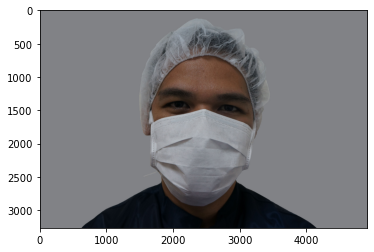

In [46]:
from PIL import Image
img=Image.open(test_files[1000])
plt.imshow(img)

In [47]:
np.array(img).shape

(3264, 4912, 3)

In [48]:
grey_files1=[]

In [49]:
for item in test_files:
    img=Image.open(item).convert('L')
    img.save('greyscale.jpeg')
    grey_files1.append(img)

In [50]:
len(grey_files1)

1033

In [51]:
np.array(grey_files1[0]).shape

(143, 158)

In [52]:
modified_files1=[]

In [53]:
for item in grey_files1:
    img=item.resize((128,128))
    modified_files1.append(img)

In [54]:
np.array(modified_files[0]).shape

(128, 128)

In [55]:
coloured_files1=[]

In [56]:
for i,fi in enumerate(modified_files1):
    im_array=np.array(fi)
    img= cv2.cvtColor(im_array,cv2.COLOR_GRAY2RGB)
    coloured_files1.append(img)

In [57]:
len(coloured_files1)

1033

In [58]:
np.array(coloured_files1[0]).shape

(128, 128, 3)

In [59]:
coloured_files1[0].shape

(128, 128, 3)

In [60]:
X_test=np.zeros((len(coloured_files1),128,128,3))
for i,fi in enumerate(coloured_files1):
    #fi_array=np.array(fi)
    if(fi.shape[0]==128 and fi.shape[1]==128):
        X_test[i,:,:,:]=fi

In [61]:
X_test/255.0

array([[[[0.92156863, 0.92156863, 0.92156863],
         [0.92156863, 0.92156863, 0.92156863],
         [0.91372549, 0.91372549, 0.91372549],
         ...,
         [0.92941176, 0.92941176, 0.92941176],
         [0.93333333, 0.93333333, 0.93333333],
         [0.91764706, 0.91764706, 0.91764706]],

        [[0.92941176, 0.92941176, 0.92941176],
         [0.90588235, 0.90588235, 0.90588235],
         [0.90588235, 0.90588235, 0.90588235],
         ...,
         [0.9372549 , 0.9372549 , 0.9372549 ],
         [0.92941176, 0.92941176, 0.92941176],
         [0.92156863, 0.92156863, 0.92156863]],

        [[0.92941176, 0.92941176, 0.92941176],
         [0.90196078, 0.90196078, 0.90196078],
         [0.92156863, 0.92156863, 0.92156863],
         ...,
         [0.90980392, 0.90980392, 0.90980392],
         [0.92156863, 0.92156863, 0.92156863],
         [0.9254902 , 0.9254902 , 0.9254902 ]],

        ...,

        [[0.92156863, 0.92156863, 0.92156863],
         [0.92156863, 0.92156863, 0.92156863]

In [62]:
Y_test=np.zeros((len(test_files)))
for i,fi in enumerate(test_files):
    p=fi.find("with_mask")
    q=fi.find("without_mask")
    if p!=-1:
        Y_test[i]=0.0
    elif q!=-1:
        Y_test[i]=1.0

In [63]:
Y_test

array([1., 1., 0., ..., 0., 1., 0.])

In [64]:
len(Y_test)

1033

In [65]:
from keras.models import Sequential

In [66]:
model=Sequential()
model_part1=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(128,128,3),
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)

In [67]:
model_part1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [68]:
model_part1.layers

In [69]:
for layer in model_part1.layers:
    layer.trainable=False

In [70]:
from keras.layers import Flatten,Dense

In [71]:
model.add(model_part1)

In [72]:
model.add(Flatten())

In [73]:
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [74]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 1e-3),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,978,370
Trainable params: 263,682
Non-trainable params: 14,714,688
_________________________________________________________________


In [76]:
model.fit(X_train, Y_train,epochs=5,validation_split=0.1)

Epoch 1/5
88/88 [==============================] - 244s 3s/step - loss: 0.6416 - accuracy: 0.9148 - val_loss: 0.4901 - val_accuracy: 0.9357
Epoch 2/5
88/88 [==============================] - 238s 3s/step - loss: 0.1473 - accuracy: 0.9649 - val_loss: 0.3445 - val_accuracy: 0.9357
Epoch 3/5
88/88 [==============================] - 237s 3s/step - loss: 0.0525 - accuracy: 0.9835 - val_loss: 0.3780 - val_accuracy: 0.9357
Epoch 4/5
88/88 [==============================] - 235s 3s/step - loss: 0.0434 - accuracy: 0.9882 - val_loss: 0.3828 - val_accuracy: 0.9486
Epoch 5/5
88/88 [==============================] - 237s 3s/step - loss: 0.0249 - accuracy: 0.9907 - val_loss: 0.3975 - val_accuracy: 0.9357


In [77]:
Y_predicted=model.predict(X_test)

33/33 [==============================] - 80s 2s/step


In [78]:
Y_predicted

array([[6.5352418e-10, 1.0000000e+00],
       [6.6279249e-09, 1.0000000e+00],
       [1.0000000e+00, 5.6377717e-14],
       ...,
       [1.0000000e+00, 8.1298790e-09],
       [1.1033006e-12, 1.0000000e+00],
       [1.0000000e+00, 5.8037020e-10]], dtype=float32)

In [79]:
len(Y_predicted)

1033

In [80]:
len(Y_predicted[0])

2

In [81]:
Y_test

array([1., 1., 0., ..., 0., 1., 0.])

In [82]:
len(Y_test)

1033

In [92]:
Y_test[12]

1.0

In [93]:
Y_predicted[12]

array([2.4294856e-16, 1.0000000e+00], dtype=float32)

In [94]:
Y_test[100]

0.0

In [95]:
Y_predicted[100]

array([1.0000000e+00, 3.3954423e-13], dtype=float32)

In [96]:
results = model.evaluate(X_test, Y_test, batch_size=128)

9/9 [==============================] - 78s 9s/step - loss: 0.2322 - accuracy: 0.9603


In [97]:
results

[0.232216015458107, 0.9603098034858704]